In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib 
import scipy as sp
import sklearn
import random
import time
import warnings
from subprocess import check_output

In [2]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [4]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')


In [5]:
raw_data=pd.read_csv('F:/Python Materials/Data Set/train.csv')

In [6]:
data_val=pd.read_csv('F:/Python Materials/Data Set/test.csv')

In [7]:
data1=raw_data.copy(deep=True)

Combining test and train data together for data cleaning.

In [8]:
data_cleaner=[data1,data_val]

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
raw_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S


Checking for null values in the data. Null values should either be filled by their mean or be dropped if most of the values are null

In [11]:
print('Train columns with null:\n',data1.isnull().sum())
print("-"*10)
print('Test columns with null:\n',data_val.isnull().sum())
print("-"*10)


Train columns with null:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


Checking the statistics of the data with describe function for the different columns.

In [12]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"West, Mrs. Edwy Arthur (Ada Mary Worth)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Filling the NULL values with usefull values to get max usage of the data

In [13]:
for data in data_cleaner:
    data['Age'].fillna(data['Age'].median(),inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
    data['Fare'].fillna(data['Fare'].mean(),inplace=True)

Checking for any further NULL values in the data. We see that cabin has 327 NULL values however, it does  not seem to play any important role in the prediction 

In [14]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Dropping irrelevant columns from the data.

In [15]:
drop_column=['Cabin','Ticket','PassengerId']
data1.drop(drop_column,axis=1,inplace=True)
data_val.drop(drop_column,axis=1,inplace=True)

In [16]:
data1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
data_val.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Below code has been used to check for class imbalance in the data. In cases of extreme imbalance we may have to handle that in the code.

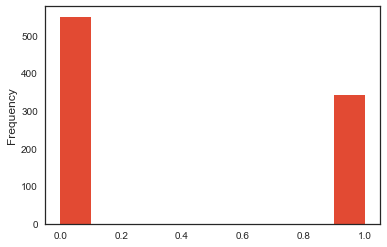

In [52]:
raw_data['Survived'].astype(int).plot.hist()

In [18]:
for data in data_cleaner:
    data['FamilySize']=data['SibSp']+data['Parch']+1
    data['IsAlone']=1
    data['IsAlone'].loc[data['FamilySize']>1]=0
    data['Title']=data['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0] 
    data['FareBin']=pd.qcut(data['Fare'],4)
    data['AgeBin']=pd.cut(data['Age'].astype(int),5)

C:\Users\Rick\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Classifying the titles into differnt classes and using MISC for those which are used less than 10 times. As per statistics if the number is 10 or less we do not consider it significant.

In [19]:
stat_min = 10
title_names=(data1['Title'].value_counts()<stat_min)

In [20]:
data1['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Mme               1
 Sir               1
 Ms                1
 the Countess      1
 Don               1
 Jonkheer          1
 Capt              1
 Lady              1
Name: Title, dtype: int64

In [21]:
title_names

 Mr              False
 Miss            False
 Mrs             False
 Master          False
 Dr               True
 Rev              True
 Col              True
 Major            True
 Mlle             True
 Mme              True
 Sir              True
 Ms               True
 the Countess     True
 Don              True
 Jonkheer         True
 Capt             True
 Lady             True
Name: Title, dtype: bool

Putting 'Misc' for titles not signifanct in the data.

In [51]:
data1['Title']=data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x]==True else x)

Using Label Encoding to convert only two features that has 2 or less categories. For rest One Hot Encoding will be used as there might be multiple classes which may cause issues for the algorithms if converted using a label encoder

In [23]:
label=LabelEncoder()

In [24]:
count=0
for col in data1:
    if data1[col].dtype=='object':
        if len(list(data1[col].unique()))<=2:
            data1[col]=label.fit_transform(data1[col])       #Train data
            data_val[col]=label.fit_transform(data_val[col]) #Test  data
            count+=1
            #print len(list(raw_data[col]))
print('%d columns were labelled encoded' %count)            

1 columns were labelled encoded


In [25]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

Creating two sepatare list of columns to check which approach gives better results.

In [26]:
target=['Survived']
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #Set1
dummy_x=pd.get_dummies(data1[data1_x])
dummy_x_cols=dummy_x.columns.tolist()

In [27]:
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] #Set2

Checking the correlation of the variablws with the output column to ensure no strong correlation. 

In [28]:
correlation=data1.corr()['Survived'].sort_values()
print('Most Positive and Negative correlations:\n',correlation.head(26))


Most Positive and Negative correlations:
 Sex             -0.543351
Sex_Code        -0.543351
Pclass          -0.338481
FareBin_Code    -0.241534
IsAlone         -0.203367
Title_Code      -0.193635
Embarked_Code   -0.167675
Age             -0.064910
AgeBin_Code     -0.044492
SibSp           -0.035322
FamilySize       0.016639
Parch            0.081629
Fare             0.257307
Survived         1.000000
Name: Survived, dtype: float64


Spitting the data into training and testing set. We are creating two different sets of train and test data to test the two different approaches.

In [29]:
train1_x_bin,test1_x_bin,train1_y_bin,test1_y_bin=model_selection.train_test_split(dummy_x[dummy_x_cols],data1[target],random_state=0)
train1_x_dummy,test1_x_dummy,train1_y_dummy,test1_y_dummy=model_selection.train_test_split(data1[data1_x_bin],data1[target],random_state=0,test_size=0.4)


Below code is to check for the servival percentage for different class of variables. 

In [31]:
for x in data1_x:
    if data1[x].dtype!='Float64':
        print(data1[[x,target[0]]].groupby(x, as_index=False).mean())

   Sex  Survived
0    0  0.742038
1    1  0.188908
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
            Title  Survived
0            Capt  0.000000
1             Col  0.500000
2             Don  0.000000
3              Dr  0.428571
4        Jonkheer  0.000000
5            Lady  1.000000
6           Major  0.500000
7          Master  0.575000
8            Miss  0.697802
9            Mlle  1.000000
10            Mme  1.000000
11             Mr  0.156673
12            Mrs  0.792000
13             Ms  1.000000
14            Rev  0.000000
15            Sir  1.000000
16   the Countess  1.000000
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200

C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app


In the below et of codes we will try to understand the data better with the help of some plots.

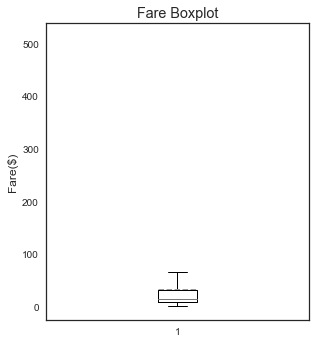

In [32]:
plt.figure(figsize=[16,12])
plt.subplot(232)
plt.boxplot(x=data1['Fare'],showmeans=True,meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare($)')

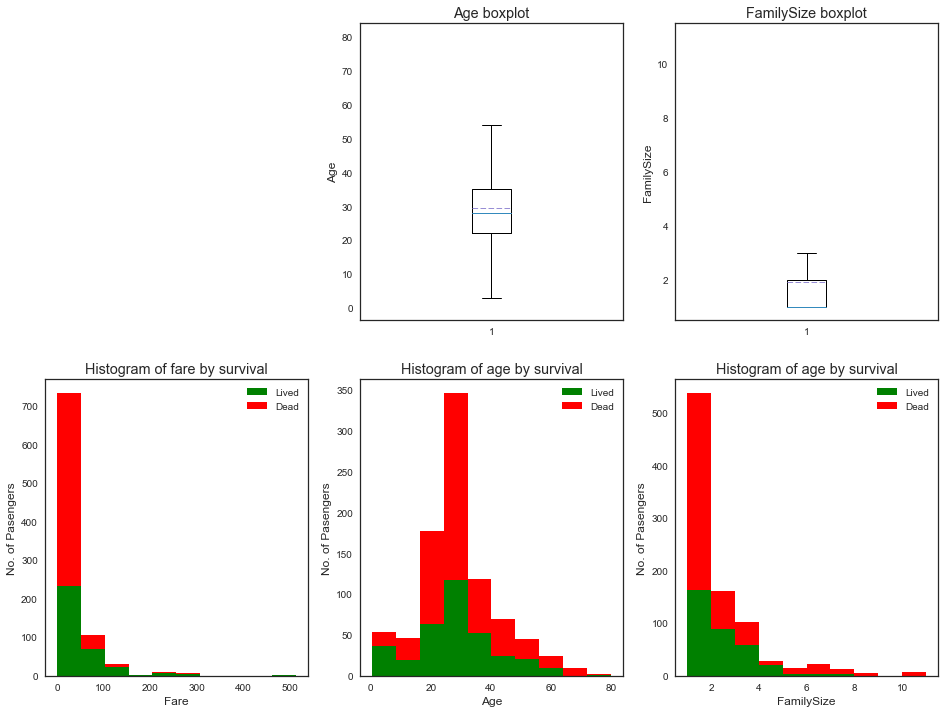

In [33]:
plt.figure(figsize=[16,12])
plt.subplot(232)
plt.boxplot(x=data1['Age'],showmeans=True,meanline=True)
plt.title('Age boxplot')
plt.ylabel('Age')


plt.subplot(233)
plt.boxplot(x=data1['FamilySize'],showmeans=True,meanline=True)
plt.title('FamilySize boxplot')
plt.ylabel('FamilySize')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'],data1[data1['Survived']==0]['Fare']],color=['g','r'],stacked=True,label=['Lived','Dead'] )
plt.title('Histogram of fare by survival')
plt.xlabel('Fare')
plt.ylabel('No. of Pasengers')
plt.legend()


plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']],color=['g','r'],stacked=True,label=['Lived','Dead'] )
plt.title('Histogram of age by survival')
plt.xlabel('Age')
plt.ylabel('No. of Pasengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'],data1[data1['Survived']==0]['FamilySize']],color=['g','r'],stacked=True,label=['Lived','Dead'] )
plt.title('Histogram of age by survival')
plt.xlabel('FamilySize')
plt.ylabel('No. of Pasengers')
plt.legend()

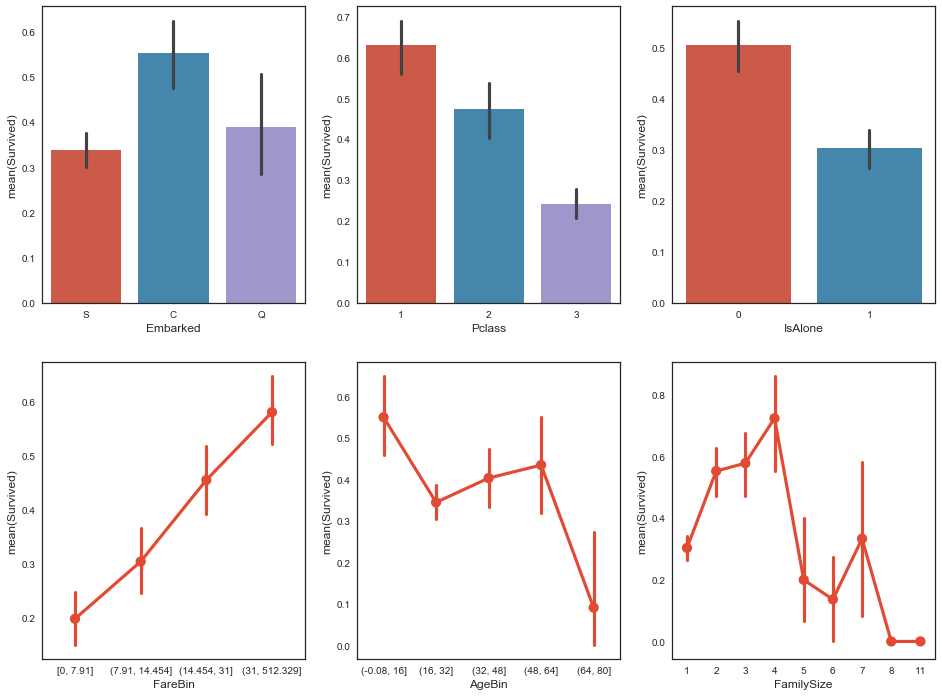

In [34]:
fig,saxis=plt.subplots(2,3,figsize=(16,12))
sns.barplot(x='Embarked',y='Survived',data=data1,ax=saxis[0,0])
sns.barplot(x='Pclass',y='Survived',data=data1,ax=saxis[0,1])
sns.barplot(x='IsAlone',y='Survived',data=data1,ax=saxis[0,2])
sns.pointplot(x='FareBin',y='Survived',data=data1,ax=saxis[1,0])
sns.pointplot(x='AgeBin',y='Survived',data=data1,ax=saxis[1,1])
sns.pointplot(x='FamilySize',y='Survived',data=data1,ax=saxis[1,2])



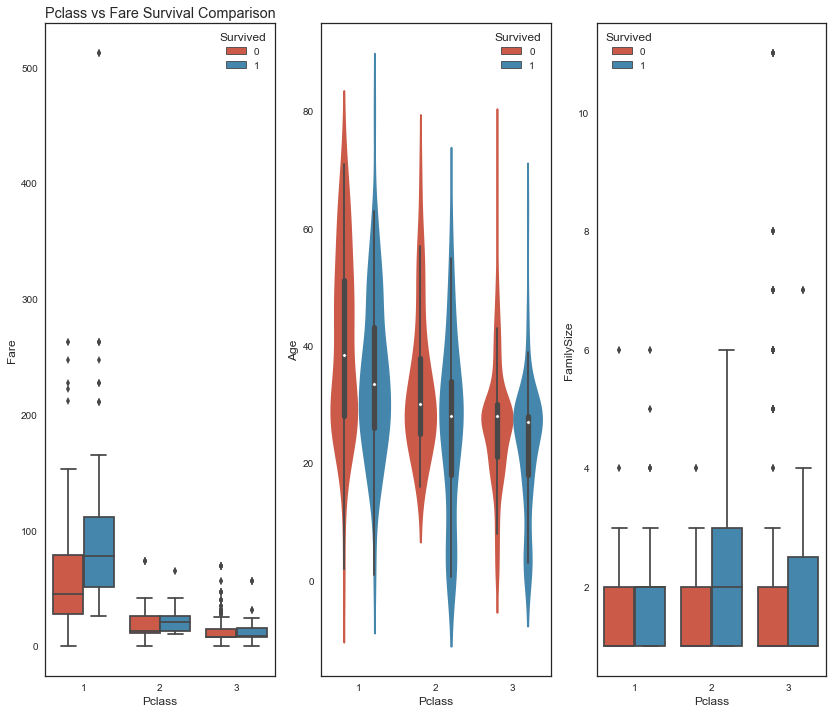

In [35]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(14,12))
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=data1,ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data1,ax=axis2)
sns.boxplot(x='Pclass',y='FamilySize',hue='Survived',data=data1,ax=axis3)

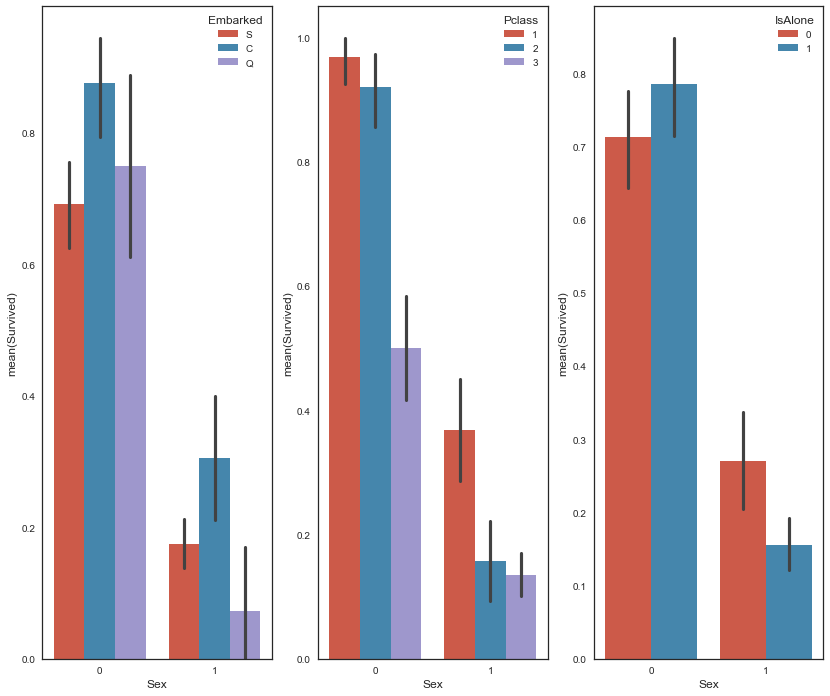

In [36]:
fig,axis=plt.subplots(1,3,figsize=[14,12])
sns.barplot(x='Sex',y='Survived',hue='Embarked',data=data1,ax=axis[0])
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=data1,ax=axis[1])
sns.barplot(x='Sex',y='Survived',hue='IsAlone',data=data1,ax=axis[2])


In the below piece of code we try to fit both the approches and check which approach gives us better results. As it is said in machine learning, if we thing an approach may work better the best way is to test it out.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logmodel=LogisticRegression()
logmodel.fit(train1_x_dummy,train1_y_dummy)
pred=logmodel.predict(test1_x_dummy)

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In the below piece of code we check the accuracy and precison and recall score and f1 score of the model. The cores look good specially re 0.79 recall score whih indicate that 79%o of the predictions are correct.   

In [54]:
accuracy_score(test1_y_dummy,pred)

0.79551820728291311

In [83]:
sklearn.metrics.f1_score(test1_y_dummy,pred,average='weighted') #We are usig weighted as to account for the class 
                                                                #imbalance we have seen previously

0.79369187476061187

In [84]:
sklearn.metrics.average_precision_score(test1_y_dummy,pred,average='weighted')

0.63741176470588234

In [85]:
sklearn.metrics.recall_score(test1_y_dummy,pred,average='weighted')

0.79551820728291311

Next we use cross validation score to test the accuracy of the model. The mean accuracy for in the below piece of code for 'neg_log_loss' scoring method it looks promising as the for neg_log_loss the value is always reduces and closer the value is to zero better is the result.

In [107]:
logmodel=LogisticRegression()
x=data1[data1_x_bin].values 
y=data1[target].values 
logmodel.fit(x,y)
c, r = y.shape
y = y.reshape(c,)
score=cross_val_score(logmodel,x,y,cv=10, scoring='neg_log_loss')
score.mean() 

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.45292224555579913

For a the scoring technique of 'roc_auc' the results also look promising with the mean score at 85%.

In [108]:
logmodel=LogisticRegression()
x=data1[data1_x_bin].values 
y=data1[target].values 
logmodel.fit(x,y)
c, r = y.shape
y = y.reshape(c,)
score=cross_val_score(logmodel,x,y,cv=10, scoring='roc_auc')
score.mean()

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85636642333701152

We next try using the K Neighbors algorithm and check how the accuracy score changes with changing value of K

In [97]:
k_range=range(1,26)
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train1_x_dummy,train1_y_dummy)
    prediction_KNN=knn.predict(test1_x_dummy)
    score.append(metrics.accuracy_score(test1_y_dummy,prediction_KNN))

C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


We observe that a K value of 5 to 6 is giving the optimum value of accuracy that is neary 84% and drops sharply when we increase the K values. 

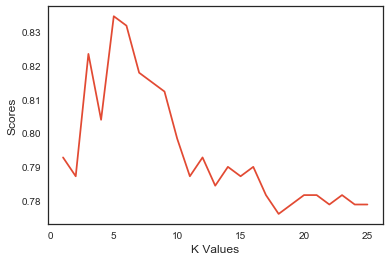

In [98]:
plt.plot(k_range,score)
plt.xlabel('K Values')
plt.ylabel('Scores')

Upon using cross_val_score on knn model we achive an accuracy score of near 80%.

In [111]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
X=data1[data1_x_bin].as_matrix(columns=None)
y=data1[target].as_matrix(columns=None)
c, r = y.shape
y = y.reshape(c,)
cross_val_score(knn,X,y,cv=10, scoring='accuracy').mean()

0.79801072522982641

Next we try the same models on the other set of features that we had created we have have not bucketed the features and used one hot encoding technque.Clearly the second method has given us better scores which i evident by the values down below. Specially a recall score of 0.807 concludes that we are correctly classifying 80% of the values. 

In [114]:
logmodel=LogisticRegression()
logmodel.fit(train1_x_bin,train1_y_bin)
pred=logmodel.predict(test1_x_bin)

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
accuracy_score(test1_y_bin,pred)

0.80717488789237668

In [117]:
sklearn.metrics.f1_score(test1_y_bin,pred,average='weighted') #We are usig weighted as to account for the class 
                                                                #imbalance we have seen previously

0.80781456290542897

In [119]:
sklearn.metrics.average_precision_score(test1_y_bin,pred,average='weighted')

0.65016776258464826

In [121]:
sklearn.metrics.recall_score(test1_y_bin,pred,average='weighted')

0.80717488789237668

In [123]:
logmodel=LogisticRegression()
x=data1[data1_x_bin].values 
y=data1[target].values 
logmodel.fit(x,y)
c, r = y.shape
y = y.reshape(c,)
score=cross_val_score(logmodel,x,y,cv=10, scoring='neg_log_loss')
score.mean() 

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.45292224555579913

The 'roc_auc' value is not muched changed and pretty much the same

In [128]:
logmodel=LogisticRegression()
x=data1[data1_x_bin].values 
y=data1[target].values 
logmodel.fit(x,y)
c, r = y.shape
y = y.reshape(c,)
score=cross_val_score(logmodel,x,y,cv=10, scoring='roc_auc')
score.mean()

C:\Users\Rick\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85636642333701152

It appears that the for this set of features we are getting a max value of 78% for a  k value of nearly 15. After that the value falls down to 72% and resonates up and down.

In [132]:
k_range=range(1,50)
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train1_x_bin,train1_y_bin)
    prediction_KNN=knn.predict(test1_x_bin)
    score.append(metrics.accuracy_score(test1_y_bin,prediction_KNN))

C:\Users\Rick\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


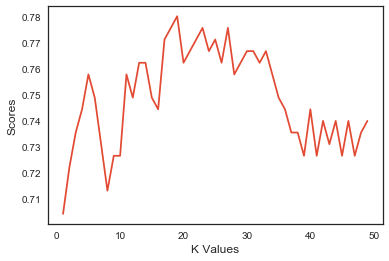

In [133]:
plt.plot(k_range,score)
plt.xlabel('K Values')
plt.ylabel('Scores')

In [134]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
X=dummy_x[dummy_x_cols].as_matrix(columns=None)
y=data1[target].as_matrix(columns=None)
c, r = y.shape
y = y.reshape(c,)
cross_val_score(knn,X,y,cv=10, scoring='accuracy').mean()

0.73080666212688683

As a conclusion we notice that the F1_score of the later Set1 of features is higher than that of Set2. Also the recall percentage is higher for Set1 compared to Set2, which proves that most of the predictions were done correctly. Hence I choose to go with the set1 features.  